# Data Cleaning for Test Dataset

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv("../datasets/test.csv")
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [4]:
df.shape

(878, 80)

# Data Cleaning

In [5]:
#Check for missing data
df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Sale Type           0
dtype: int64

In [6]:
df.isnull().sum().sum()

4171

## Variables with missing data

### Pool QC - drop variable due to only 9 observed values

In [7]:
df["Pool QC"].value_counts()

Ex    3
TA    1
Name: Pool QC, dtype: int64

In [8]:
df.drop(columns=["Pool QC"], inplace=True)

In [9]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,112,0,0,0,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,0,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,184,0,0,0,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,185,0,NaN,NaN,0,7,2009,WD


### Misc Feature - drop variable due to only 65 observations

In [10]:
df["Misc Feature"].value_counts()

Shed    39
Othr     1
Gar2     1
Name: Misc Feature, dtype: int64

In [11]:
df.drop(columns=["Misc Feature"], inplace=True)

In [12]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,60,112,0,0,0,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,24,0,0,0,0,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,184,0,0,0,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,76,0,0,185,0,NaN,0,7,2009,WD


### Alley - drop variable due to only 140 observations

In [13]:
df["Alley"].isnull().sum()

820

In [14]:
df["Alley"].value_counts()

Grvl    35
Pave    23
Name: Alley, dtype: int64

In [15]:
df.drop(columns=["Alley"], inplace=True)

In [16]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,NaN,0,7,2009,WD


### Consider dropping Fence - 400 observations.

In [17]:
df["Fence"].value_counts()

MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

#### Instead, let's create a dummy variable, fence vs no fence

In [18]:
df['HasFence'] = (pd.notnull(df["Fence"])).astype(int)

In [19]:
df["HasFence"].value_counts()

0    706
1    172
Name: HasFence, dtype: int64

In [20]:
df.drop(columns=["Fence"], inplace=True)

In [21]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,HasFence
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,0,4,2006,WD,0
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,8,2006,WD,0
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,0,7,2007,WD,0
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,0,7,2009,WD,0


### Lot Frontage - come back to this and consider trying to predict it

In [22]:
df["Lot Frontage"].isnull().sum()

160

In [23]:
df[df["Lot Frontage"].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,HasFence
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,8,2006,WD,0
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,0,7,2009,WD,0
7,858,907202130,20,RL,NaN,9286,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,10,2009,WD,0
13,818,906230030,90,RL,NaN,7976,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,10,2009,WD,0
20,222,905105070,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,...,90,0,0,0,0,0,5,2010,WD,1


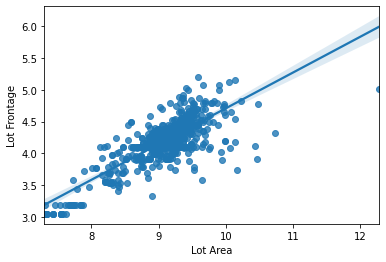

In [24]:
sns.regplot(np.log(df["Lot Area"]), np.log(df["Lot Frontage"]))

In [25]:
df["Lot Shape"].value_counts()

Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64

In [26]:
df.groupby("Lot Shape")["Lot Frontage"].mean()

Lot Shape
IR1     75.108696
IR2     91.500000
IR3    120.000000
Reg     66.568665
Name: Lot Frontage, dtype: float64

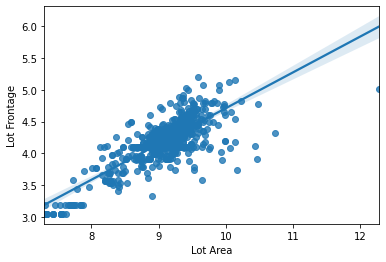

In [27]:
sns.regplot(np.log(df["Lot Area"]), np.log(df["Lot Frontage"]))

In [30]:
#Log transform variables prior to modeling
df["log_lot_area"] = np.log(df["Lot Area"])

df["log_lot_frontage"] = np.log(df["Lot Frontage"])

In [32]:
df[["Lot Area", "log_lot_area", "Lot Frontage", "log_lot_frontage"]]

,Lot Area,log_lot_area,Lot Frontage,log_lot_frontage
0,9142,9.120634,69.0,4.234107
1,9662,9.175956,NaN,NaN
2,17104,9.747068,58.0,4.060443
3,8520,9.050172,60.0,4.094345
4,9500,9.159047,NaN,NaN
...,...,...,...,...
873,8000,8.987197,80.0,4.382027
874,14670,9.593560,90.0,4.499810
875,8250,9.017968,55.0,4.007333
876,9000,9.104980,60.0,4.094345


#### Lot Shape - convert to dummies

In [33]:
df["Lot Shape"].value_counts()

Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64

#### Lot Config - convert to dummies

In [34]:
df["Lot Config"].value_counts()

Inside     636
Corner     163
CulDSac     49
FR2         25
FR3          5
Name: Lot Config, dtype: int64

#### Land Slope - convert to dummies

In [35]:
df["Land Slope"].value_counts()

Gtl    835
Mod     37
Sev      6
Name: Land Slope, dtype: int64

In [36]:
#Create dummies for Lot Shape, Lot Config, Land Slope
df = pd.get_dummies(df, columns=["Lot Shape", "Lot Config", "Land Slope"], drop_first=True)

In [37]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Utilities,Neighborhood,...,log_lot_frontage,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev
0,2658,902301120,190,RM,69.0,9142,Pave,Lvl,AllPub,OldTown,...,4.234107,0,0,1,0,0,0,1,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,Lvl,AllPub,Sawyer,...,NaN,0,0,0,0,0,0,1,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,Lvl,AllPub,Gilbert,...,4.060443,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,Lvl,AllPub,OldTown,...,4.094345,0,0,1,0,0,0,1,0,0
4,625,535105100,20,RL,NaN,9500,Pave,Lvl,AllPub,NAmes,...,NaN,0,0,0,0,0,0,1,0,0


In [38]:
#Save file without missing values on Lot Frontage for sub-modeling
df_front = df[df["Lot Frontage"].notnull()]

In [39]:
df_front.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Utilities,Neighborhood,...,log_lot_frontage,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev
0,2658,902301120,190,RM,69.0,9142,Pave,Lvl,AllPub,OldTown,...,4.234107,0,0,1,0,0,0,1,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,Lvl,AllPub,Gilbert,...,4.060443,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,Lvl,AllPub,OldTown,...,4.094345,0,0,1,0,0,0,1,0,0
5,333,923228370,160,RM,21.0,1890,Pave,Lvl,AllPub,MeadowV,...,3.044522,0,0,1,0,0,0,1,0,0
6,1327,902427150,20,RM,52.0,8516,Pave,Lvl,AllPub,OldTown,...,3.951244,0,0,1,0,0,0,1,0,0


In [40]:
df_front.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Land Contour', 'Utilities', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual

In [41]:
#Define X & y variables
f_X_list = ['log_lot_area', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_Inside']
f_X = df_front[f_X_list]
f_y = df_front["log_lot_frontage"]

In [42]:
# Train test split
f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(f_X, f_y, test_size = .25, random_state=42)

In [43]:
#Insantiate model
frontage_mod = LinearRegression()

In [44]:
# Get cross validation
cross_val_score(frontage_mod, f_X_train, f_y_train, cv=5).mean()

0.6900703235512512

In [45]:
frontage_mod.fit(f_X_train, f_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Check train model score
frontage_mod.score(f_X_train, f_y_train)

0.7070613336768944

In [47]:
#Check test model score
frontage_mod.score(f_X_test, f_y_test)

0.6150828466686142

Again, not great, probably a little overfitting here, but still better than mere mean substitution

In [48]:
X = sm.add_constant(f_X)
y = f_y
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_lot_frontage   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     380.1
Date:                Thu, 09 Apr 2020   Prob (F-statistic):          4.06e-175
Time:                        09:08:20   Log-Likelihood:                 105.66
No. Observations:                 718   AIC:                            -201.3
Df Residuals:                     713   BIC:                            -178.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7894      0.139     -5.697      0.000      -1.061      -0.517
log_lot_area           0.5623      0.015     37.422      0.000       0.533       0.592
Lot Config_CulDSac    -0.4361      0.048     -9.011      0.000      -0.531      -0.341
Lot Config_FR2        -0.2017      0.056     -3.626      0.000      -0.311      -0.093
Lot Config_Inside     -0.1393      0.021     -6.756      0.000      -0.180      -0.099
==============================================================================
Omnibus:                       74.253   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.006
Skew:                          -0.398   Prob(JB):                     2.37e-64
Kurtosis:                       6.026   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
preds = frontage_mod.predict(f_X_test)

In [50]:
resids = f_y_test - preds

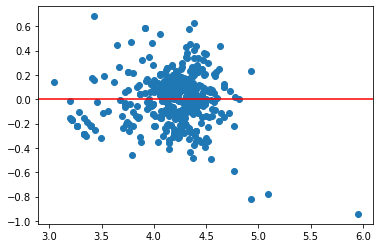

In [51]:
plt.scatter(preds, resids)
plt.axhline(0, color='r');

In [52]:
#Run predictions on full file including those with original missing values
p_X_list = ['log_lot_area', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_Inside']
p_X = df[p_X_list]
p_y = df["log_lot_frontage"]

In [53]:
df["pred_lot_frontage"] = np.exp(frontage_mod.predict(p_X))

In [54]:
df[["Lot Frontage", "pred_lot_frontage"]]

,Lot Frontage,pred_lot_frontage
0,69.0,66.833144
1,NaN,68.915097
2,58.0,94.590837
3,60.0,64.272188
4,NaN,68.271963
...,...,...
873,80.0,62.066541
874,90.0,86.872324
875,55.0,63.134675
876,60.0,59.655957


In [55]:
#Replace missing values with those from prediction sub-model
df["Lot Frontage"].replace(np.nan, df["pred_lot_frontage"], inplace=True)

In [56]:
df[["Lot Frontage", "pred_lot_frontage"]]

,Lot Frontage,pred_lot_frontage
0,69.000000,66.833144
1,68.915097,68.915097
2,58.000000,94.590837
3,60.000000,64.272188
4,68.271963,68.271963
...,...,...
873,80.000000,62.066541
874,90.000000,86.872324
875,55.000000,63.134675
876,60.000000,59.655957


### Mas Vnr Type - consider dummifying

In [57]:
df["Mas Vnr Type"].value_counts()

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [58]:
df[["Mas Vnr Type", "Mas Vnr Area"]].sort_values("Mas Vnr Type")

,Mas Vnr Type,Mas Vnr Area
77,BrkCmn,161.0
410,BrkCmn,435.0
207,BrkCmn,216.0
771,BrkCmn,58.0
457,BrkCmn,54.0
...,...,...
378,Stone,166.0
129,Stone,120.0
67,Stone,182.0
742,Stone,145.0


In [59]:
df["Mas Vnr Type"].replace(np.nan, "None", inplace=True)

In [60]:
df["Mas Vnr Type"].value_counts()

None       535
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [61]:
df.isnull().sum().sort_values(ascending=False).head(25)

Fireplace Qu         422
log_lot_frontage     160
Garage Qual           45
Garage Finish         45
Garage Yr Blt         45
Garage Cond           45
Garage Type           44
Bsmt Qual             25
Bsmt Exposure         25
Bsmt Cond             25
BsmtFin Type 1        25
BsmtFin Type 2        25
Mas Vnr Area           1
Electrical             1
BsmtFin SF 1           0
BsmtFin SF 2           0
Foundation             0
Exter Cond             0
Exter Qual             0
Bsmt Unf SF            0
Total Bsmt SF          0
Heating                0
Heating QC             0
Mas Vnr Type           0
pred_lot_frontage      0
dtype: int64

### Mas Vnr Area - going to drop variable. Too thinly distributed.

In [62]:
df["Mas Vnr Area"].value_counts()

0.0      532
216.0      7
80.0       5
420.0      5
196.0      5
        ... 
464.0      1
312.0      1
101.0      1
238.0      1
208.0      1
Name: Mas Vnr Area, Length: 232, dtype: int64

In [63]:
df["Mas Vnr Area"].mean()

106.23603192702394

In [64]:
pd.crosstab(df["Mas Vnr Type"], df["Mas Vnr Area"])

Mas Vnr Area,0.0,11.0,14.0,16.0,18.0,20.0,23.0,32.0,34.0,44.0,...,788.0,870.0,877.0,921.0,975.0,1159.0,1170.0,1224.0,1290.0,1378.0
Mas Vnr Type,,,,,,,,,,,,,,,,,,,,,
BrkCmn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BrkFace,0,1,2,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
CBlock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
None,532,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Stone,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [65]:
df.drop(columns="Mas Vnr Area", inplace=True)

## Basement Variables
### Bsmt Qual

In [66]:
df["Bsmt Qual"].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [67]:
df['Bsmt Qual'] = df['Bsmt Qual'].map({'TA': 'TA', 'Gd': "Gd", "Ex": "Ex", "Fa": "FairPoor", "Po": "FairPoor"})

In [68]:
df["Bsmt Qual"].value_counts()

TA          396
Gd          355
Ex           73
FairPoor     29
Name: Bsmt Qual, dtype: int64

In [69]:
df["Bsmt Qual"].replace(np.nan, "No Basement", inplace=True)

In [70]:
df["Bsmt Qual"].value_counts()

TA             396
Gd             355
Ex              73
FairPoor        29
No Basement     25
Name: Bsmt Qual, dtype: int64

### Bsmt Cond - will drop from model since vast majority of data has same value

In [71]:
df["Bsmt Cond"].value_counts()

TA    781
Fa     39
Gd     33
Name: Bsmt Cond, dtype: int64

In [72]:
df.drop(columns="Bsmt Cond", inplace=True)

### Bsmt Exposure

In [73]:
df["Bsmt Exposure"].value_counts()

No    567
Av    130
Gd     80
Mn     76
Name: Bsmt Exposure, dtype: int64

In [74]:
df[["Bsmt Qual", "Bsmt Exposure"]].sort_values("Bsmt Exposure")

,Bsmt Qual,Bsmt Exposure
523,TA,Av
471,Gd,Av
470,Gd,Av
240,Gd,Av
591,Gd,Av
...,...,...
621,No Basement,NaN
625,No Basement,NaN
654,No Basement,NaN
702,No Basement,NaN


In [75]:
df["HasAvGdBsmtExposure"] = ((df["Bsmt Exposure"] == "Av") | (df["Bsmt Exposure"] == "Gd")).astype(int)

In [76]:
df[["Bsmt Qual", "Bsmt Exposure", "HasAvGdBsmtExposure"]].sort_values("Bsmt Exposure")

,Bsmt Qual,Bsmt Exposure,HasAvGdBsmtExposure
523,TA,Av,1
471,Gd,Av,1
470,Gd,Av,1
240,Gd,Av,1
591,Gd,Av,1
...,...,...,...
621,No Basement,NaN,0
625,No Basement,NaN,0
654,No Basement,NaN,0
702,No Basement,NaN,0


In [77]:
df.drop(columns="Bsmt Exposure", inplace=True)

In [78]:
df.isnull().sum().sort_values(ascending=False).head(20)

Fireplace Qu        422
log_lot_frontage    160
Garage Cond          45
Garage Qual          45
Garage Finish        45
Garage Yr Blt        45
Garage Type          44
BsmtFin Type 1       25
BsmtFin Type 2       25
Electrical            1
BsmtFin SF 1          0
Exterior 2nd          0
Bsmt Qual             0
Foundation            0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Exter Cond            0
Exter Qual            0
dtype: int64

### BsmtFin Type 1

In [79]:
df["BsmtFin Type 1"].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64

In [80]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1"]].sort_values("BsmtFin Type 1")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1
557,Gd,0,ALQ
498,TA,1,ALQ
493,Gd,0,ALQ
489,TA,0,ALQ
487,Gd,0,ALQ
...,...,...,...
621,No Basement,0,NaN
625,No Basement,0,NaN
654,No Basement,0,NaN
702,No Basement,0,NaN


In [81]:
df["BsmtFin Type 1"].replace(np.nan, "No Basement", inplace=True)

In [82]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1"]].sort_values("BsmtFin Type 1")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1
607,TA,0,ALQ
623,TA,0,ALQ
810,TA,0,ALQ
230,TA,1,ALQ
232,TA,0,ALQ
...,...,...,...
436,Gd,0,Unf
435,Ex,1,Unf
434,TA,0,Unf
475,Gd,0,Unf


In [83]:
df.isnull().sum().sort_values(ascending=False).head(20)

Fireplace Qu        422
log_lot_frontage    160
Garage Cond          45
Garage Qual          45
Garage Finish        45
Garage Yr Blt        45
Garage Type          44
BsmtFin Type 2       25
Electrical            1
BsmtFin SF 1          0
BsmtFin Type 1        0
Exterior 2nd          0
Bsmt Qual             0
Foundation            0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Exter Cond            0
Exter Qual            0
dtype: int64

### BsmtFin SF 1

In [84]:
df["BsmtFin SF 1"].value_counts()

0      273
24      10
602      4
936      4
600      4
      ... 
601      1
604      1
605      1
609      1
472      1
Name: BsmtFin SF 1, Length: 462, dtype: int64

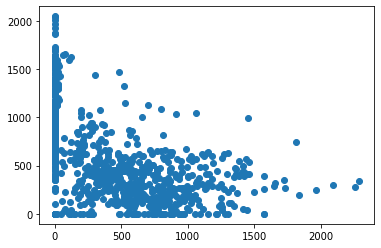

In [85]:
plt.scatter(df["BsmtFin SF 1"], df["Bsmt Unf SF"])

In [86]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1", "BsmtFin SF 1"]].sort_values("BsmtFin SF 1")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1,BsmtFin SF 1
0,FairPoor,0,Unf,0
433,Gd,0,Unf,0
430,No Basement,0,No Basement,0
424,Gd,0,Unf,0
423,TA,0,Unf,0
...,...,...,...,...
826,Ex,0,GLQ,1836
628,Ex,1,GLQ,1965
170,Ex,1,GLQ,2096
103,Ex,1,GLQ,2257


In [87]:
df["BsmtFin SF 1"].replace(np.nan, 0, inplace=True)

In [88]:
df["BsmtFin SF 1"].value_counts()

0      273
24      10
602      4
936      4
600      4
      ... 
601      1
604      1
605      1
609      1
472      1
Name: BsmtFin SF 1, Length: 462, dtype: int64

In [89]:
df.isnull().sum().sort_values(ascending=False).head(20)

Fireplace Qu        422
log_lot_frontage    160
Garage Cond          45
Garage Qual          45
Garage Finish        45
Garage Yr Blt        45
Garage Type          44
BsmtFin Type 2       25
Electrical            1
BsmtFin SF 1          0
BsmtFin Type 1        0
Exterior 2nd          0
Bsmt Qual             0
Foundation            0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Exter Cond            0
Exter Qual            0
dtype: int64

### Bsmt Fin Type 2

In [90]:
df["BsmtFin Type 2"].value_counts()

Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64

In [91]:
749 / 878

0.8530751708428246

In [92]:
# Decided just to drop this variable
df.drop(columns="BsmtFin Type 2", inplace=True)

In [93]:
df.isnull().sum().sort_values(ascending=False).head(20)

Fireplace Qu           422
log_lot_frontage       160
Garage Cond             45
Garage Qual             45
Garage Finish           45
Garage Yr Blt           45
Garage Type             44
Electrical               1
Bsmt Qual                0
Exter Qual               0
Exter Cond               0
Foundation               0
HasAvGdBsmtExposure      0
Exterior 2nd             0
BsmtFin Type 1           0
BsmtFin SF 1             0
BsmtFin SF 2             0
Bsmt Unf SF              0
Total Bsmt SF            0
Heating                  0
dtype: int64

### BsmtFin SF 2

In [94]:
df["BsmtFin SF 2"].value_counts()

0      774
147      2
435      2
287      2
480      2
      ... 
543      1
544      1
606      1
627      1
393      1
Name: BsmtFin SF 2, Length: 96, dtype: int64

In [95]:
# Drop this variable as well
df.drop(columns="BsmtFin SF 2", inplace=True)

In [96]:
df.isnull().sum().sort_values(ascending=False).head(15)

Fireplace Qu           422
log_lot_frontage       160
Garage Cond             45
Garage Qual             45
Garage Finish           45
Garage Yr Blt           45
Garage Type             44
Electrical               1
Foundation               0
Exter Qual               0
Exter Cond               0
HasAvGdBsmtExposure      0
Exterior 2nd             0
Bsmt Qual                0
BsmtFin Type 1           0
dtype: int64

### Bsmt Unf SF

In [97]:
df["Bsmt Unf SF"].value_counts()

0      79
270     7
100     5
840     5
396     5
       ..
567     1
569     1
575     1
576     1
438     1
Name: Bsmt Unf SF, Length: 562, dtype: int64

In [98]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1", "BsmtFin SF 1",
    "Bsmt Unf SF"]].sort_values("Bsmt Unf SF")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF
250,Gd,1,GLQ,1573,0
308,Gd,1,GLQ,1152,0
314,No Basement,0,No Basement,0,0
320,No Basement,0,No Basement,0,0
644,Gd,1,BLQ,973,0
...,...,...,...,...,...
108,TA,0,Unf,0,1921
1,Gd,0,Unf,0,1967
244,Ex,1,Unf,0,2002
85,Ex,0,Unf,0,2042


In [99]:
df["Bsmt Unf SF"].replace(np.nan, 0, inplace=True)

In [100]:
df.isnull().sum().sort_values(ascending=False).head(15)

Fireplace Qu           422
log_lot_frontage       160
Garage Cond             45
Garage Qual             45
Garage Finish           45
Garage Yr Blt           45
Garage Type             44
Electrical               1
Foundation               0
Exter Qual               0
Exter Cond               0
HasAvGdBsmtExposure      0
Exterior 2nd             0
Bsmt Qual                0
BsmtFin Type 1           0
dtype: int64

### Total Bsmt SF

In [101]:
df["Total Bsmt SF"].value_counts()

0       25
864     23
768     10
672      9
780      9
        ..
1657     1
635      1
636      1
1664     1
1553     1
Name: Total Bsmt SF, Length: 526, dtype: int64

In [102]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1", "BsmtFin SF 1",
    "Bsmt Unf SF", "Total Bsmt SF"]].sort_values("Total Bsmt SF")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF
625,No Basement,0,No Basement,0,0,0
78,No Basement,0,No Basement,0,0,0
112,No Basement,0,No Basement,0,0,0
527,No Basement,0,No Basement,0,0,0
37,No Basement,0,No Basement,0,0,0
...,...,...,...,...,...,...
170,Ex,1,GLQ,2096,300,2396
463,Ex,1,GLQ,1455,989,2444
103,Ex,1,GLQ,2257,278,2535
756,Ex,1,GLQ,1812,740,2552


In [103]:
df["Total Bsmt SF"].replace(np.nan, 0, inplace=True)

In [104]:
df.isnull().sum().sort_values(ascending=False).head(15)

Fireplace Qu           422
log_lot_frontage       160
Garage Cond             45
Garage Qual             45
Garage Finish           45
Garage Yr Blt           45
Garage Type             44
Electrical               1
Foundation               0
Exter Qual               0
Exter Cond               0
HasAvGdBsmtExposure      0
Exterior 2nd             0
Bsmt Qual                0
BsmtFin Type 1           0
dtype: int64

### Bsmt Full Bath

In [105]:
df["Bsmt Full Bath"].value_counts()

0    507
1    356
2     15
Name: Bsmt Full Bath, dtype: int64

In [106]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1", "BsmtFin SF 1",
    "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath"]].sort_values("Bsmt Full Bath")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath
0,FairPoor,0,Unf,0,1020,1020,0
490,TA,0,Unf,0,994,994,0
491,Gd,0,Unf,0,1498,1498,0
492,TA,0,Unf,0,1100,1100,0
495,Gd,0,Unf,0,1375,1375,0
...,...,...,...,...,...,...,...
13,Ex,0,GLQ,820,348,1168,2
445,TA,1,GLQ,1324,113,1437,2
103,Ex,1,GLQ,2257,278,2535,2
306,TA,1,ALQ,1249,103,1499,2


In [107]:
df["Bsmt Full Bath"].replace(np.nan, 0, inplace=True)

In [108]:
df.isnull().sum().sort_values(ascending=False).head(15)

Fireplace Qu           422
log_lot_frontage       160
Garage Cond             45
Garage Qual             45
Garage Finish           45
Garage Yr Blt           45
Garage Type             44
Electrical               1
Foundation               0
Exter Qual               0
Exter Cond               0
HasAvGdBsmtExposure      0
Exterior 2nd             0
Bsmt Qual                0
BsmtFin Type 1           0
dtype: int64

### Bsmt Half Bath

In [109]:
df["Bsmt Half Bath"].value_counts()

0    829
1     49
Name: Bsmt Half Bath, dtype: int64

In [110]:
df[["Bsmt Qual", "HasAvGdBsmtExposure", "BsmtFin Type 1", "BsmtFin SF 1",
    "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"]].sort_values("Bsmt Half Bath")

,Bsmt Qual,HasAvGdBsmtExposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,FairPoor,0,Unf,0,1020,1020,0,0
572,TA,0,LwQ,332,301,876,0,0
573,Gd,1,GLQ,870,0,870,1,0
574,TA,0,LwQ,958,437,1395,1,0
575,TA,0,Rec,299,555,894,1,0
...,...,...,...,...,...,...,...,...
250,Gd,1,GLQ,1573,0,1573,1,1
840,TA,0,ALQ,698,467,1165,0,1
33,Gd,0,BLQ,1084,92,1176,0,1
783,Gd,1,GLQ,660,108,768,0,1


In [111]:
df["Bsmt Half Bath"].replace(np.nan, 0, inplace=True)

In [112]:
pd.crosstab(df["Bsmt Full Bath"], df["Bsmt Half Bath"])

Bsmt Half Bath,0,1
Bsmt Full Bath,,
0,463,44
1,351,5
2,15,0


In [113]:
df["HasBsmtFullBath"] = (df["Bsmt Full Bath"] > 0).astype(int)
df["HasBsmtHalfBath"] = (df["Bsmt Half Bath"] > 0).astype(int)

In [114]:
df["HasBsmtFullBath"].value_counts()

0    507
1    371
Name: HasBsmtFullBath, dtype: int64

In [115]:
df["HasBsmtHalfBath"].value_counts()

0    829
1     49
Name: HasBsmtHalfBath, dtype: int64

In [116]:
df.drop(columns=["Bsmt Full Bath", "Bsmt Half Bath"], inplace=True)

In [117]:
df.isnull().sum().sort_values(ascending=False).head(15)

Fireplace Qu        422
log_lot_frontage    160
Garage Yr Blt        45
Garage Cond          45
Garage Qual          45
Garage Finish        45
Garage Type          44
Electrical            1
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
HasBsmtHalfBath       0
Exterior 2nd          0
BsmtFin Type 1        0
dtype: int64

## Fireplace variables

### Fireplaces

In [118]:
df["Fireplaces"].value_counts()

0    422
1    375
2     75
3      6
Name: Fireplaces, dtype: int64

In [119]:
df['HasFireplace'] = (df["Fireplaces"] > 0).astype(int)

In [120]:
df["HasFireplace"].value_counts()

1    456
0    422
Name: HasFireplace, dtype: int64

In [121]:
df.drop(columns="Fireplaces", inplace=True)

In [122]:
df.isnull().sum().sort_values(ascending=False).head(15)

Fireplace Qu        422
log_lot_frontage    160
Garage Yr Blt        45
Garage Cond          45
Garage Qual          45
Garage Finish        45
Garage Type          44
Electrical            1
BsmtFin Type 1        0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
HasFireplace          0
Exterior 2nd          0
dtype: int64

### Fireplace Qu

In [123]:
df["Fireplace Qu"].value_counts()

Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64

In [124]:
pd.crosstab(df["HasFireplace"], df["Fireplace Qu"])

Fireplace Qu,Ex,Fa,Gd,Po,TA
HasFireplace,,,,,
1,12,16,220,15,193


In [125]:
df["HasExGdFireplace"] = ((df["Fireplace Qu"] == "Ex") | (df["Fireplace Qu"] == "Gd")).astype(int)

In [126]:
df["HasExGdFireplace"].value_counts()

0    646
1    232
Name: HasExGdFireplace, dtype: int64

In [127]:
pd.crosstab(df["HasFireplace"], df["HasExGdFireplace"])

HasExGdFireplace,0,1
HasFireplace,,
0,422,0
1,224,232


In [128]:
df.drop(columns="Fireplace Qu", inplace=True)

In [129]:
df.isnull().sum().sort_values(ascending=False).head(15)

log_lot_frontage    160
Garage Finish        45
Garage Cond          45
Garage Yr Blt        45
Garage Qual          45
Garage Type          44
Electrical            1
BsmtFin Type 1        0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
HasExGdFireplace      0
BsmtFin SF 1          0
Exterior 2nd          0
dtype: int64

### Garage Variables
#### Garage Type

In [130]:
df["Garage Type"].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
Basment      9
2Types       4
CarPort      4
Name: Garage Type, dtype: int64

In [131]:
df["Garage Type"].replace(np.nan, "NoGarage", inplace=True)

In [132]:
df["Garage Type"].value_counts()

Attchd      518
Detchd      246
BuiltIn      53
NoGarage     44
Basment       9
2Types        4
CarPort       4
Name: Garage Type, dtype: int64

#### Garage Yr Blt

In [133]:
df["Garage Yr Blt"].sort_values(ascending=False)

452    2010.0
315    2010.0
316    2010.0
533    2009.0
608    2009.0
        ...  
764       NaN
779       NaN
803       NaN
813       NaN
859       NaN
Name: Garage Yr Blt, Length: 878, dtype: float64

In [134]:
df["Garage Yr Blt"].replace(2207, 2007, inplace=True)

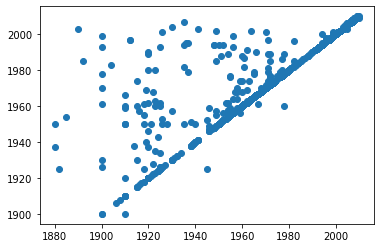

In [135]:
plt.scatter(df["Year Built"], df["Garage Yr Blt"]);

In [136]:
df['Garage Blt After House'] = (df["Garage Yr Blt"] > df["Year Built"]).astype(int)

In [137]:
df['Garage Blt After House'].value_counts()

0    714
1    164
Name: Garage Blt After House, dtype: int64

In [138]:
df.drop(columns="Garage Yr Blt", inplace=True )

#### Garage Finish

In [139]:
df["Garage Finish"].value_counts()

Unf    382
RFn    233
Fin    218
Name: Garage Finish, dtype: int64

In [140]:
pd.crosstab(df["Garage Finish"], df["Garage Type"])

Garage Type,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
Garage Finish,,,,,,
Fin,1,166,1,38,0,12
RFn,1,209,2,11,0,10
Unf,2,143,6,4,4,223


In [141]:
#These only apply to the training data file
# df.loc[(df['Garage Finish'].isnull()) & (df["Garage Type"] == 'Detchd'), 'Garage Finish']='Unf'

In [142]:
# df.loc[[1712], ['Garage Type','Garage Finish']]

In [143]:
df["Garage Finish"].value_counts()

Unf    382
RFn    233
Fin    218
Name: Garage Finish, dtype: int64

In [144]:
df["Garage Finish"].replace(np.nan, "NoGarage", inplace=True)

In [145]:
df["Garage Finish"].value_counts()

Unf         382
RFn         233
Fin         218
NoGarage     45
Name: Garage Finish, dtype: int64

In [146]:
df.isnull().sum().sort_values(ascending=False).head(10)

log_lot_frontage          160
Garage Qual                45
Garage Cond                45
Electrical                  1
Garage Blt After House      0
Mas Vnr Type                0
Exter Qual                  0
Exter Cond                  0
Foundation                  0
Bsmt Qual                   0
dtype: int64

#### Garage Cars

In [147]:
df[["Garage Type", "Garage Finish", "Garage Cars", "Garage Area"]].sort_values("Garage Cars")

,Garage Type,Garage Finish,Garage Cars,Garage Area
113,NoGarage,NoGarage,0,0
629,NoGarage,NoGarage,0,0
305,NoGarage,NoGarage,0,0
29,NoGarage,NoGarage,0,0
698,NoGarage,NoGarage,0,0
...,...,...,...,...
749,Attchd,RFn,3,880
383,BuiltIn,Fin,3,670
13,BuiltIn,Fin,4,820
32,Detchd,Unf,4,864


In [148]:
df.groupby("Garage Type")["Garage Cars"].mean()

Garage Type
2Types      2.250000
Attchd      1.932432
Basment     1.555556
BuiltIn     2.339623
CarPort     1.500000
Detchd      1.528455
NoGarage    0.000000
Name: Garage Cars, dtype: float64

In [149]:
df["Garage Cars"].replace(np.nan, 2, inplace=True)

#### Garage Area

In [150]:
df[["Garage Type", "Garage Finish", "Garage Cars", "Garage Area"]].sort_values("Garage Area")

,Garage Type,Garage Finish,Garage Cars,Garage Area
45,NoGarage,NoGarage,0,0
29,NoGarage,NoGarage,0,0
591,NoGarage,NoGarage,0,0
152,NoGarage,NoGarage,0,0
337,NoGarage,NoGarage,0,0
...,...,...,...,...
238,Attchd,Fin,3,1134
422,BuiltIn,Unf,3,1200
399,Detchd,RFn,3,1248
85,Attchd,RFn,3,1390


In [151]:
df.groupby(["Garage Type", "Garage Cars"])["Garage Area"].mean()

Garage Type  Garage Cars
2Types       1               544.000000
             2               460.000000
             3               893.000000
Attchd       1               319.649573
             2               517.777429
             3               819.073171
Basment      1               314.500000
             2               499.600000
BuiltIn      1               360.400000
             2               495.538462
             3               778.142857
             4               820.000000
CarPort      1               287.000000
             2               458.000000
Detchd       1               298.616000
             2               520.745614
             3               863.400000
             4              1176.000000
NoGarage     0                 0.000000
Name: Garage Area, dtype: float64

In [152]:
df["Garage Area"].replace(np.nan, 533, inplace=True)

In [153]:
pd.crosstab(df["Garage Type"], df["Garage Finish"])

Garage Finish,Fin,NoGarage,RFn,Unf
Garage Type,,,,
2Types,1,0,1,2
Attchd,166,0,209,143
Basment,1,0,2,6
BuiltIn,38,0,11,4
CarPort,0,0,0,4
Detchd,12,1,10,223
NoGarage,0,44,0,0


#### Garage Qual - Dropped variable due to ~90% having same value

In [154]:
df["Garage Qual"].value_counts()

TA    782
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

In [155]:
782 / 878

0.8906605922551253

In [156]:
df.drop(columns="Garage Qual", inplace=True)

In [157]:
df.shape

(878, 81)

#### Garage Cond - dropped variable due to ~90% having same value

In [158]:
df["Garage Cond"].value_counts()

TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

In [159]:
df.drop(columns="Garage Cond", inplace=True)

In [160]:
df.isnull().sum().sort_values(ascending=False).head(5)

log_lot_frontage          160
Electrical                  1
Garage Blt After House      0
BsmtFin Type 1              0
Exterior 2nd                0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      878 non-null    int64  
 1   PID                     878 non-null    int64  
 2   MS SubClass             878 non-null    int64  
 3   MS Zoning               878 non-null    object 
 4   Lot Frontage            878 non-null    float64
 5   Lot Area                878 non-null    int64  
 6   Street                  878 non-null    object 
 7   Land Contour            878 non-null    object 
 8   Utilities               878 non-null    object 
 9   Neighborhood            878 non-null    object 
 10  Condition 1             878 non-null    object 
 11  Condition 2             878 non-null    object 
 12  Bldg Type               878 non-null    object 
 13  House Style             878 non-null    object 
 14  Overall Qual            878 non-null    in

## Create dummy variables for remaining categorical variables

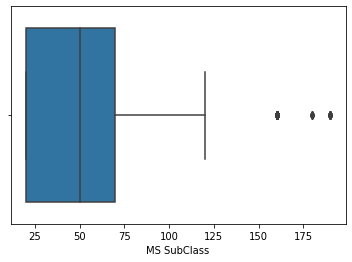

In [162]:
sns.boxplot(df["MS SubClass"])

In [163]:
# Convert variable to be categorical
df["MS SubClass"] = [str(n) for n in df["MS SubClass"]]
df["MS SubClass"].value_counts()

20     309
60     180
50      89
120     60
160     41
30      38
70      38
90      34
80      32
85      20
190     15
45       7
75       7
180      6
40       2
Name: MS SubClass, dtype: int64

In [164]:
df["MS Zoning"].value_counts()

RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS Zoning, dtype: int64

In [165]:
df["Street"].value_counts()

Pave    873
Grvl      5
Name: Street, dtype: int64

In [166]:
df["Land Contour"].value_counts()

Lvl    790
Bnk     36
HLS     35
Low     17
Name: Land Contour, dtype: int64

In [167]:
df["IsNotLevelContour"] = (df["Land Contour"] != "Lvl").astype(int)
df["IsNotLevelContour"].value_counts()

0    790
1     88
Name: IsNotLevelContour, dtype: int64

In [168]:
df["Utilities"].value_counts()

AllPub    877
NoSewr      1
Name: Utilities, dtype: int64

In [169]:
df["Neighborhood"].value_counts()

NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Crawfor     32
BrkSide     32
Mitchel     32
IDOTRR      24
Timber      24
NoRidge     23
ClearCr     17
SWISU       16
StoneBr     13
MeadowV     13
BrDale      11
Veenker      7
Blmngtn      6
NPkVill      6
Greens       5
Blueste      4
Name: Neighborhood, dtype: int64

In [170]:
df["Condition 1"].value_counts()

Norm      755
Feedr      55
Artery     22
RRAn       14
PosN       11
PosA        8
RRAe        7
RRNe        3
RRNn        3
Name: Condition 1, dtype: int64

In [171]:
df["IsNotNormalCondition1"] = (df["Condition 1"] != "Norm").astype(int)
df["IsNotNormalCondition1"].value_counts()

0    755
1    123
Name: IsNotNormalCondition1, dtype: int64

In [172]:
df["Condition 2"].value_counts()

Norm     875
Feedr      2
PosA       1
Name: Condition 2, dtype: int64

In [173]:
df["IsNotNormalCondition2"] = (df["Condition 2"] != "Norm").astype(int)
df["IsNotNormalCondition2"].value_counts()

0    875
1      3
Name: IsNotNormalCondition2, dtype: int64

In [174]:
df["Bldg Type"].value_counts()

1Fam      724
TwnhsE     72
Duplex     34
Twnhs      32
2fmCon     16
Name: Bldg Type, dtype: int64

In [175]:
df["House Style"].value_counts()

1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: House Style, dtype: int64

In [176]:
pd.crosstab(df["MS SubClass"], df["House Style"])

House Style,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
MS SubClass,,,,,,,,
120,0,0,58,0,0,0,2,0
160,0,0,0,0,0,40,0,1
180,0,0,0,0,0,0,5,1
190,6,0,3,0,3,3,0,0
20,0,0,309,0,0,0,0,0
30,2,1,35,0,0,0,0,0
40,0,0,2,0,0,0,0,0
45,1,6,0,0,0,0,0,0
50,85,0,0,0,0,4,0,0


In [177]:
df["Roof Style"].value_counts()

Gable      702
Hip        153
Gambrel     10
Flat         7
Mansard      4
Shed         2
Name: Roof Style, dtype: int64

In [178]:
df["IsHipRoof"] = (df["Roof Style"] == "Hip").astype(int)
df["IsHipRoof"].value_counts()

0    725
1    153
Name: IsHipRoof, dtype: int64

In [179]:
df["Roof Matl"].value_counts()

CompShg    861
Tar&Grv      8
WdShake      5
WdShngl      2
Roll         1
Metal        1
Name: Roof Matl, dtype: int64

In [180]:
df["Exterior 1st"].value_counts()

VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     35
BrkFace     24
Stucco      16
AsbShng     11
WdShing     11
BrkComm      3
AsphShn      1
PreCast      1
Name: Exterior 1st, dtype: int64

In [181]:
#Combine low frequency levels into OtherExt level
df['Exterior 1st'] = df['Exterior 1st'].map({"VinylSd": "VinylSd",
                                             "MetalSd": "MetalSd",
                                             "HdBoard": "HdBoard",
                                             "Wd Sdng": "Wd Sdng",
                                             "Plywood": "Plywood",
                                             "CemntBd": "CemntBd",
                                             "BrkFace": "BrkFace",
                                             "WdShing": "WdShing",
                                             "AsbShng": "AsbShng",
                                             "Stucco": "Stucco",
                                             "BrkComm": "OtherExt",
                                             "CBlock": "OtherExt",
                                             "Stone": "OtherExt",
                                             "ImStucc": "OtherExt",
                                             "AsphShn": "OtherExt"})
df['Exterior 1st'].value_counts()

VinylSd     302
Wd Sdng     144
HdBoard     142
MetalSd     119
Plywood      69
CemntBd      35
BrkFace      24
Stucco       16
AsbShng      11
WdShing      11
OtherExt      4
Name: Exterior 1st, dtype: int64

In [182]:
df["Exterior 2nd"].value_counts()

VinylSd    294
Wd Sdng    135
HdBoard    131
MetalSd    123
Plywood     89
CmentBd     35
Wd Shng     18
Stucco      17
BrkFace     13
AsbShng     10
Brk Cmn      5
ImStucc      4
AsphShn      1
PreCast      1
CBlock       1
Other        1
Name: Exterior 2nd, dtype: int64

In [183]:
pd.crosstab(df["Exterior 1st"], df["Exterior 2nd"])

Exterior 2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior 1st,,,,,,,,,,,,,,,
AsbShng,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0
BrkFace,0,0,0,12,0,0,1,0,1,0,2,1,0,6,1
CemntBd,0,0,0,0,0,34,0,0,0,0,0,0,0,1,0
HdBoard,0,0,0,0,0,0,124,2,1,0,14,0,0,0,1
MetalSd,0,0,0,0,0,0,2,0,116,0,0,1,0,0,0
OtherExt,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
Plywood,0,0,4,0,1,0,0,1,0,0,62,0,0,1,0
Stucco,0,0,0,0,0,1,0,0,0,0,0,13,0,1,1
VinylSd,0,0,0,0,0,0,0,0,2,1,1,0,294,2,2


In [184]:
df["DiffExt2"] = (df["Exterior 1st"] != df["Exterior 2nd"]).astype(int)
df["DiffExt2"].value_counts()

0    753
1    125
Name: DiffExt2, dtype: int64

In [185]:
df["Mas Vnr Type"].value_counts()

None       535
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [186]:
df["Exter Qual"].value_counts()

TA    552
Gd    292
Ex     25
Fa      9
Name: Exter Qual, dtype: int64

In [187]:
df["Exter Cond"].value_counts()

TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: Exter Cond, dtype: int64

In [188]:
df["Foundation"].value_counts()

PConc     383
CBlock    381
BrkTil     90
Slab       15
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [189]:
df["Bsmt Qual"].value_counts()

TA             396
Gd             355
Ex              73
FairPoor        29
No Basement     25
Name: Bsmt Qual, dtype: int64

In [190]:
df["BsmtFin Type 1"].value_counts()

Unf            248
GLQ            243
ALQ            136
Rec            105
BLQ             69
LwQ             52
No Basement     25
Name: BsmtFin Type 1, dtype: int64

In [191]:
df["Heating"].value_counts()

GasA     866
GasW       7
Grav       4
Floor      1
Name: Heating, dtype: int64

In [192]:
df["Heating QC"].value_counts()

Ex    429
TA    267
Gd    157
Fa     25
Name: Heating QC, dtype: int64

In [193]:
df["Central Air"].value_counts()

Y    823
N     55
Name: Central Air, dtype: int64

In [194]:
df["Central Air"] = df["Central Air"].map({"Y": 1, "N": 0})
df["Central Air"].value_counts()

1    823
0     55
Name: Central Air, dtype: int64

In [195]:
df["Electrical"].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [196]:
df["NotStdElectrical"] = (df["Electrical"] != "SBrkr").astype(int)
df["NotStdElectrical"].value_counts()

0    813
1     65
Name: NotStdElectrical, dtype: int64

In [197]:
df["Kitchen Qual"].value_counts()

TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64

In [198]:
df["Functional"].value_counts()

Typ     812
Min2     28
Min1     23
Maj1      7
Mod       6
Maj2      2
Name: Functional, dtype: int64

In [199]:
df["IsNotTypFunctional"] = (df["Functional"] != "Typ").astype(int)
df["IsNotTypFunctional"].value_counts()

0    812
1     66
Name: IsNotTypFunctional, dtype: int64

In [200]:
df["Garage Type"].value_counts()

Attchd      518
Detchd      246
BuiltIn      53
NoGarage     44
Basment       9
2Types        4
CarPort       4
Name: Garage Type, dtype: int64

In [201]:
df["Garage Finish"].value_counts()

Unf         382
RFn         233
Fin         218
NoGarage     45
Name: Garage Finish, dtype: int64

In [202]:
df["Paved Drive"].value_counts()

Y    790
N     65
P     23
Name: Paved Drive, dtype: int64

In [203]:
df["IsNotPavedDrive"] = (df["Paved Drive"] != "Y").astype(int)
df["IsNotPavedDrive"].value_counts()

0    790
1     88
Name: IsNotPavedDrive, dtype: int64

In [204]:
df["Sale Type"].value_counts()

WD       755
New       78
COD       24
ConLD      9
ConLw      3
Oth        3
CWD        2
ConLI      2
VWD        1
Con        1
Name: Sale Type, dtype: int64

In [205]:
#Drop columns I don't need or want anymore
df.drop(columns=["Street",
                 "Land Contour",
                 "Utilities",
                 "Condition 1",
                 "Condition 2",
                 "Roof Style",
                 "Roof Matl",
                 "Exterior 2nd",
                 "Heating",
                 "Electrical",
                 "Functional",
                 "Paved Drive"],
         inplace = True)

In [206]:
#Create dummy variables for any I didn't manually create above
df = pd.get_dummies(df, columns=["MS SubClass",
                                 "MS Zoning",
                                 "Neighborhood",
                                 "Bldg Type",
                                 "House Style",
                                 "Exterior 1st",
                                 "Mas Vnr Type",
                                 "Exter Qual",
                                 "Exter Cond",
                                 "Foundation",
                                 "Bsmt Qual",
                                 "BsmtFin Type 1",
                                 "Heating QC",
                                 "Kitchen Qual",
                                 "Garage Type",
                                 "Garage Finish",
                                 "Sale Type"], 
                    drop_first=True)

In [207]:
df.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,...,Garage Finish_Unf,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,69.000000,9142,6,8,1910,1950,0,1020,...,1,0,0,0,0,0,0,0,0,1
1,2718,905108090,68.915097,9662,5,4,1977,1977,0,1967,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,58.000000,17104,7,5,2006,2006,554,100,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,60.000000,8520,5,6,1923,2006,0,968,...,1,0,0,0,0,0,0,0,0,1
4,625,535105100,68.271963,9500,6,5,1963,1963,609,785,...,0,0,0,0,0,0,0,0,0,1


In [208]:
#Re-run this on data including predicted values
df["log_lot_frontage_all"] = np.log(df["Lot Frontage"])

In [209]:
df.columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Bsmt Unf SF',
       ...
       'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'log_lot_frontage_all'],
      dtype='object', length=176)

In [210]:
# https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe
cols = df.columns.tolist()
cols

['Id',
 'PID',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'HasFence',
 'log_lot_area',
 'log_lot_frontage',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Land Slope_Mod',
 'Land Slope_Sev',
 'pred_lot_frontage',
 'HasAvGdBsmtExposure',
 'HasBsmtFullBath',
 'HasBsmtHalfBath',
 'HasFireplace',
 'HasExGdFireplace',
 'Garage Blt After House',
 'IsNotLevelContour',
 'IsNotNormalCondition1',
 'IsNotNormalCondition2',
 'IsHipRoof',
 'DiffExt2',
 'NotStdElectrical',
 'Is

In [211]:
# Reorder cleaned dataset
# df_test_cl = df.loc[:, ['Id',
#                    'PID',
#                    'MS SubClass_20',
#                    'MS SubClass_30',
#                    'MS SubClass_40',
#                    'MS SubClass_45',
#                    'MS SubClass_50',
#                    'MS SubClass_60',
#                    'MS SubClass_70',
#                    'MS SubClass_75',
#                    'MS SubClass_80',
#                    'MS SubClass_85',
#                    'MS SubClass_90',
#                    'MS SubClass_160',
#                    'MS SubClass_180',
#                    'MS SubClass_190', 
#                    'MS Zoning_FV',
#                    'MS Zoning_I (all)',
#                    'MS Zoning_RH',
#                    'MS Zoning_RL',
#                    'MS Zoning_RM',
#                    'Lot Frontage',
#                    'Lot Area',
#                    'Lot Shape_IR2',
#                    'Lot Shape_IR3',
#                    'Lot Shape_Reg',
#                    'IsNotLevelContour', 
#                    'Lot Config_CulDSac',
#                    'Lot Config_FR2',
#                    'Lot Config_FR3',
#                    'Lot Config_Inside',
#                    'Land Slope_Mod',
#                    'Land Slope_Sev',
#                    'Neighborhood_Blueste',
#                    'Neighborhood_BrDale',
#                    'Neighborhood_BrkSide',
#                    'Neighborhood_ClearCr',
#                    'Neighborhood_CollgCr',
#                    'Neighborhood_Crawfor',
#                    'Neighborhood_Edwards',
#                    'Neighborhood_Gilbert',
#                    'Neighborhood_Greens',
#                    'Neighborhood_IDOTRR',
#                    'Neighborhood_MeadowV',
#                    'Neighborhood_Mitchel',
#                    'Neighborhood_NAmes',
#                    'Neighborhood_NPkVill',
#                    'Neighborhood_NWAmes',
#                    'Neighborhood_NoRidge',
#                    'Neighborhood_NridgHt',
#                    'Neighborhood_OldTown',
#                    'Neighborhood_SWISU',
#                    'Neighborhood_Sawyer',
#                    'Neighborhood_SawyerW',
#                    'Neighborhood_Somerst',
#                    'Neighborhood_StoneBr',
#                    'Neighborhood_Timber',
#                    'Neighborhood_Veenker', 
#                    'IsNotNormalCondition1',
#                    'IsNotNormalCondition2',
#                    'Bldg Type_2fmCon',
#                    'Bldg Type_Duplex',
#                    'Bldg Type_Twnhs',
#                    'Bldg Type_TwnhsE', 
#                    'House Style_1.5Unf',
#                    'House Style_1Story',
#                    'House Style_2.5Fin',
#                    'House Style_2.5Unf',
#                    'House Style_2Story',
#                    'House Style_SFoyer',
#                    'House Style_SLvl',
#                    'Overall Qual',
#                    'Overall Cond',
#                    'Year Built',
#                    'Year Remod/Add',
#                    'IsHipRoof', 
#                    'Exterior 1st_BrkFace',
#                    'Exterior 1st_CemntBd',
#                    'Exterior 1st_HdBoard',
#                    'Exterior 1st_MetalSd',
#                    'Exterior 1st_Plywood',
#                    'Exterior 1st_Stucco',
#                    'Exterior 1st_VinylSd',
#                    'Exterior 1st_Wd Sdng',
#                    'Exterior 1st_WdShing',
#                    'Exterior 1st_OtherExt',
#                    'DiffExt2', 
#                    'Mas Vnr Type_BrkFace',
#                    'Mas Vnr_CBlock', 
#                    'Mas Vnr Type_Stone',
#                    'Mas Vnr Type_None',
#                    'Exter Qual_Fa',
#                    'Exter Qual_Gd',
#                    'Exter Qual_TA',
#                    'Exter Cond_Fa',
#                    'Exter Cond_Gd',
#                    'Exter Cond_Po',
#                    'Exter Cond_TA',
#                    'Foundation_CBlock',
#                    'Foundation_PConc',
#                    'Foundation_Slab',
#                    'Foundation_Stone',
#                    'Foundation_Wood',
#                    'Bsmt Qual_Gd',
#                    'Bsmt Qual_TA',
#                    'Bsmt Qual_FairPoor',
#                    'Bsmt Qual_No Basement', 
#                    'HasAvGdBsmtExposure',
#                    'BsmtFin Type 1_BLQ',
#                    'BsmtFin Type 1_GLQ',
#                    'BsmtFin Type 1_LwQ',
#                    'BsmtFin Type 1_Rec',
#                    'BsmtFin Type 1_Unf',
#                    'BsmtFin Type 1_No Basement',
#                    'BsmtFin SF 1',
#                    'Bsmt Unf SF',
#                    'Total Bsmt SF',
#                    'Heating QC_Fa',
#                    'Heating QC_Gd',
#                    'Heating QC_TA',
#                    'Central Air',
#                    'NotStdElectrical',
#                    '1st Flr SF',
#                    '2nd Flr SF',
#                    'Low Qual Fin SF',
#                    'Gr Liv Area', 
#                    'HasBsmtFullBath',
#                    'HasBsmtHalfBath',
#                    'Full Bath',
#                    'Half Bath',
#                    'Bedroom AbvGr',
#                    'Kitchen AbvGr',
#                    'Kitchen Qual_Gd',
#                    'Kitchen Qual_TA',
#                    'Kitchen Qual_Fa',
#                    'Kitchen Qual_Po', 
#                    'TotRms AbvGrd',
#                    'IsNotTypFunctional',
#                    'HasFireplace',
#                    'HasExGdFireplace', 
#                    'Garage Type_Attchd',
#                    'Garage Type_Basment',
#                    'Garage Type_BuiltIn',
#                    'Garage Type_CarPort',
#                    'Garage Type_Detchd',
#                    'Garage Type_NoGarage', 
#                    'Garage Blt After House', 
#                    'Garage Finish_NoGarage',
#                    'Garage Finish_RFn',
#                    'Garage Finish_Unf',
#                    'Garage Cars',
#                    'Garage Area', 
#                    'IsNotPavedDrive',
#                    'Wood Deck SF',
#                    'Open Porch SF',
#                    'Enclosed Porch',
#                    '3Ssn Porch',
#                    'Screen Porch',
#                    'Pool Area',
#                    'HasFence',
#                    'Misc Val',
#                    'Mo Sold',
#                    'Yr Sold', 
#                    'Sale Type_CWD',
#                    'Sale Type_Con',
#                    'Sale Type_ConLD',
#                    'Sale Type_ConLI',
#                    'Sale Type_ConLw',
#                    'Sale Type_New',
#                    'Sale Type_Oth',
#                    'Sale Type_WD ',
#                    'Sale Type_VWD', 
#                    'log_lot_area',
#                    'pred_lot_frontage',
#                    'log_lot_frontage',
#                    'log_lot_frontage_all']]

In [212]:
df["Age At Sale"] = (df["Yr Sold"] - df["Year Built"])
df["Age At Sale"].value_counts()

1      64
0      35
2      28
5      20
4      19
       ..
79      1
78      1
75      1
74      1
129     1
Name: Age At Sale, Length: 112, dtype: int64

In [213]:
df["Age At Sale"].sort_values()

847      0
554      0
113      0
776      0
533      0
      ... 
51     120
817    122
27     126
19     127
32     129
Name: Age At Sale, Length: 878, dtype: int64

In [214]:
df["Years Since Remod/Add"] = (df["Yr Sold"] - df["Year Remod/Add"])
df["Years Since Remod/Add"].value_counts()

0     77
1     56
56    30
10    29
4     29
58    26
2     26
3     25
6     25
7     25
8     24
5     24
9     23
57    23
59    20
11    20
12    17
14    17
39    16
36    15
15    14
37    13
29    13
33    13
47    12
13    12
38    12
16    11
60    11
40    11
32    11
51    10
42    10
43     9
30     9
28     8
44     8
53     8
52     8
46     8
31     8
23     8
20     7
26     7
41     7
27     7
34     7
45     7
17     7
48     6
50     6
25     6
35     6
49     5
19     5
24     5
21     5
55     5
54     4
18     2
Name: Years Since Remod/Add, dtype: int64

In [215]:
df["Years Since Remod/Add"].sort_values()

826     0
797     0
396     0
599     0
604     0
       ..
855    60
362    60
180    60
447    60
224    60
Name: Years Since Remod/Add, Length: 878, dtype: int64

In [216]:
df["Lot Area"].describe()

count       878.000000
mean      10307.033030
std       10002.674602
min        1477.000000
25%        7297.250000
50%        9446.000000
75%       11589.000000
max      215245.000000
Name: Lot Area, dtype: float64

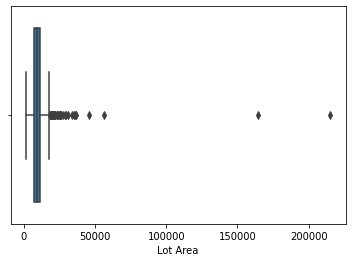

In [217]:
sns.boxplot(df["Lot Area"])

#### Create indicator variables for unique characteristics

In [218]:
df["Lot Area > 30k"] = (df["Lot Area"] > 30_000).astype(int)
df["Lot Area > 30k"].value_counts()

0    869
1      9
Name: Lot Area > 30k, dtype: int64

In [219]:
df["Unique Old Houses"] = ((df["Age At Sale"] > 110) & (df["Overall Qual"] >= 7)).astype(int)
df["Unique Old Houses"].value_counts()

0    875
1      3
Name: Unique Old Houses, dtype: int64

In [228]:
df["1st Flr SF > 3000"] = (df["1st Flr SF"] > 3000).astype(int)
df["1st Flr SF > 3000"].value_counts()

0    878
Name: 1st Flr SF > 3000, dtype: int64

In [220]:
# df.drop(columns=["Year Built", "Year Remod/Add"], inplace=True)

In [221]:
df_cl = df

In [222]:
df_cl.shape

(878, 180)

### Feature Engineering

In [223]:
a_list = ["1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", 
          "Gr Liv Area", "Wood Deck SF", "Open Porch SF", "Pool Area"]

In [224]:
df_cl["Total Bsmt SF"].min()

0

In [225]:
df_cl[a_list] = df_cl[a_list].astype(float)

In [226]:
df_cl[a_list].dtypes

1st Flr SF         float64
2nd Flr SF         float64
Low Qual Fin SF    float64
Gr Liv Area        float64
Wood Deck SF       float64
Open Porch SF      float64
Pool Area          float64
dtype: object

In [227]:
#Log transform variables
df_cl["Log 1st Flr SF"] = np.log(df_cl["1st Flr SF"])
df_cl["Log Gr Liv Area"] = np.log(df_cl["Gr Liv Area"])
df_cl["Log Lot Area"] = np.log(df_cl["Lot Area"])
df_cl["Log Lot Frontage"] = np.log(df_cl["Lot Frontage"])

### Interactions to Test

In [229]:
df['Quality * Age'] = df["Overall Qual"] * df["Age At Sale"]
df['Log Lot Area * Log 1st Flr SF'] = df["Log Lot Area"] * df["Log 1st Flr SF"]
df['Garage Cars * Garage Area'] = df['Garage Cars'] * df["Garage Area"]
df['Log Gr Liv Area * Log Lot Area'] = df['Log Gr Liv Area'] * df['Log Lot Area']
df['Log Gr Liv Area * Full Bath'] = df['Log Gr Liv Area'] * df['Full Bath']
df['Pool Area * Lot Lot Area'] = df['Pool Area'] * df['Log Lot Area']
df['Age At Sale * Years Since Remod'] = df["Age At Sale"] * df["Years Since Remod/Add"]

### Other effects

In [232]:
df['Log Gr Liv Area ^ 2']= df['Log Gr Liv Area']**2
df['Log Gr Liv Area ^ 3']= df['Log Gr Liv Area']**3
df['Quality ^ 2'] = df['Overall Qual']**2
df['Quality ^ 3'] = df['Overall Qual']**3

## Save cleaned test data to a csv file

In [233]:
df_cl.to_csv("../datasets/test_cleaned.csv", index=False)

In [231]:
cl_cols = df_cl.columns.tolist()
# cl_cols